# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow # import library google.colab.patches ในส่วนย่อย cv2_imshow

## Use cv.getStructuringElement()

In [2]:
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(rect3x3)
print(cross3x3)
print(ellipse3x3)
print(rect5x5)
print(cross5x5)
print(ellipse5x5)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## Load Circuit Image / Convert2Binary

In [3]:
!wget https://i.pinimg.com/originals/f3/45/7d/f3457dddf49fc14b01a93982fd1a4b9a.jpg #ดาวน์โหลดภาพ

--2022-09-25 07:37:14--  https://i.pinimg.com/originals/f3/45/7d/f3457dddf49fc14b01a93982fd1a4b9a.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.200.156.19, 23.200.156.13, 2600:1407:3c00:25::1721:1609, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.200.156.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17793 (17K) [image/jpeg]
Saving to: ‘f3457dddf49fc14b01a93982fd1a4b9a.jpg’

f3457dddf49fc14b01a 100%[===================>]  17.38K  --.-KB/s    in 0s      

2022-09-25 07:37:14 (139 MB/s) - ‘f3457dddf49fc14b01a93982fd1a4b9a.jpg’ saved [17793/17793]



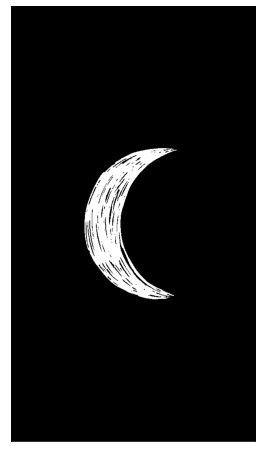

In [4]:
src = cv.imread("./img.jpg") #อ่านไฟล์ circles.png และเก็บในตัวแปร src
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)# แปลงภาพเป็น BGR2GRAY
_,bin_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
plt.rcParams["figure.figsize"] = [15, 8]  #กำหนดขนาดภาพ 15x8
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

**นำภาพต้นฉบับมาพองให้ได้ภาพทึบไม่มีช่องว่าง โดยทำการพอง 2รอบ**

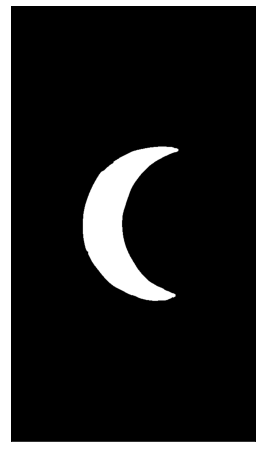

In [16]:
dilated_ellipse5x5_img = cv.dilate(bin_img, ellipse5x5, iterations = 2)
plt.imshow(dilated_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

**จากนั้นนำภาพจากข้างบนมาทำการกัด**

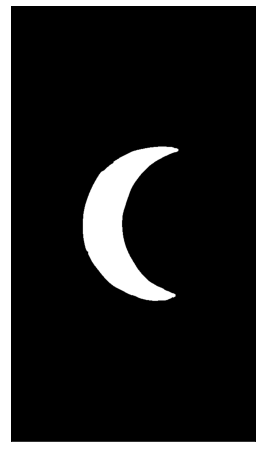

In [19]:
eroded_ellipse5x5_img = cv.erode(dilated_ellipse5x5_img, ellipse5x5, iterations = 2)
plt.imshow(dilated_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

**จากนั้นนำภาพ dilated_ellipse5x5_img - eroded_ellipse5x5_img ก็จะได้ภาพตามผลลัพธ์**

ขนาดของเส้นขอบขึ้นอยู่กับจำนวนรอบในการกัด กัดน้อยขอบบาง กัดมากขอบหนา

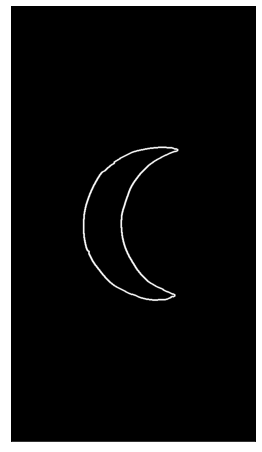

In [20]:
output = dilated_ellipse5x5_img - eroded_ellipse5x5_img
plt.imshow(output,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()